<a href="https://colab.research.google.com/github/TracyWhitneyAkinyi/Breast-Cancer-Classification-Using-SHAP/blob/main/Breast_Cancer_Classification_using_SHAP_and_LIME_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Classification

Breast cancer is one of the most prevalent cancers among women worldwide. Breast cancer is a type of cancer that begins in the breast. Cancer begins when the cells begin to grow out of control forming a tumor. Tumors can either be felt as lump or examined by use of an x-ray machine.In brest cancer we have two types of tumors,**benign** and **malignant**. A benign tumor does not invade its surrounding areas of the tissue or spread around the  body, whereas a malignant tumor may invade its surrounding tissue or spread around the body

Early diagnosis of breast cancer can significantly improve prognosis as well as chance of survival. Further accurate classification of tumors can prevent patients from going through unnnecessary treatment,hence using Artificial Intelligence and/or Machine Learning is really advantageous for classification and forecast modelling.

**Objective:** Perform binary classification of the breast cancer tumor,that is either Malignant(M) or Benign (B) using machine learning.Then use SHAP question the reliability of the model.

First , we begin by importing the necessary libraries:

In [ ]:
#import libaries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

Then we read the dataset and have a brief view of what we are going to work with using **head(),describe() and info()**

In [ ]:
#load data
cancer=pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv")

In [ ]:
cancer.head()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    914102        13.16         20.54           84.06      538.7   
1     91858        11.75         17.56           75.89      422.9   
2  88466802        10.65         25.22           68.01      347.0   
3   9111843        12.00         28.23           76.77      442.5   
4  84862001        16.13         20.68          108.10      798.8   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.07335           0.05275         0.01800              0.01256   
1          0.10730           0.09713         0.05282              0.04440   
2          0.09657           0.07234         0.02379              0.01615   
3          0.08437           0.06450         0.04055              0.01945   
4          0.11700           0.20220         0.17220              0.10280   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.1713  ...          28.46            95.29       648.3   
1         0.1598  ...          27.98            88.52       552.3   
2         0.1897  ...          35.19            77.98       455.7   
3         0.1615  ...          37.88            85.07       523.7   
4         0.2164  ...          31.48           136.80      1315.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1118             0.1646          0.07698               0.04195   
1            0.1349             0.1854          0.13660               0.10100   
2            0.1499             0.1398          0.11250               0.06136   
3            0.1208             0.1856          0.18110               0.07116   
4            0.1789             0.4233          0.47840               0.20730   

   symmetry_worst  fractal_dimension_worst  diagnosis  
0          0.2687                  0.07429          B  
1          0.2478                  0.07757          B  
2          0.3409                  0.08147          B  
3          0.2447                  0.08194          B  
4          0.3706                  0.11420          M  

[5 rows x 32 columns]

In [ ]:
#drop unnecessary columns
cancer.drop('id',axis=1,inplace=True)

In [ ]:

cancer.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   398.000000    398.000000      398.000000   398.000000   
mean     14.070997     19.331985       91.589121   651.631910   
std       3.577839      4.221225       24.706388   358.679197   
min       6.981000     10.720000       43.790000   143.500000   
25%      11.645000     16.172500       74.690000   415.375000   
50%      13.205000     18.895000       85.660000   538.300000   
75%      15.745000     21.660000      103.700000   780.325000   
max      28.110000     33.810000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       398.000000        398.000000      398.000000           398.000000   
mean          0.096289          0.103197        0.087454             0.047821   
std           0.012988          0.050805        0.079728             0.038329   
min           0.052630          0.026500        0.000000             0.000000   
25%           0.086635          0.066013        0.028010             0.019787   
50%           0.096515          0.095090        0.059935             0.033420   
75%           0.105300          0.129550        0.126675             0.068282   
max           0.132600          0.345400        0.426400             0.191300   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     398.000000              398.000000  ...    398.000000   
mean        0.181122                0.062800  ...     16.202219   
std         0.026829                0.006794  ...      4.898797   
min         0.106000                0.049960  ...      7.930000   
25%         0.161650                0.057717  ...     12.980000   
50%         0.179300                0.061770  ...     14.800000   
75%         0.195675                0.066188  ...     18.540000   
max         0.290600                0.095750  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     398.000000       398.000000   398.000000        398.000000   
mean       25.647286       106.882337   876.737186          0.132595   
std         6.171891        34.370030   581.202196          0.022235   
min        12.870000        50.410000   185.200000          0.084840   
25%        20.807500        83.730000   510.325000          0.116875   
50%        25.225000        96.085000   671.500000          0.131600   
75%        29.622500       125.075000  1048.500000          0.146375   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         398.000000       398.000000            398.000000   
mean            0.249983         0.269575              0.112627   
std             0.150280         0.210256              0.065617   
min             0.043270         0.000000              0.000000   
25%             0.148600         0.116500              0.063532   
50%             0.211750         0.223050              0.100465   
75%             0.330650         0.377400              0.157250   
max             0.937900         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      398.000000               398.000000  
mean         0.288792                 0.083445  
std          0.058800                 0.016469  
min          0.156500                 0.055040  
25%          0.250050                 0.071240  
50%          0.280650                 0.080210  
75%          0.316875                 0.091990  
max          0.577400                 0.148600  

[8 rows x 30 columns]

In [ ]:
#check for null values
cancer.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

That's great, our dataset doesn't have any missing values

In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              398 non-null    float64
 1   texture_mean             398 non-null    float64
 2   perimeter_mean           398 non-null    float64
 3   area_mean                398 non-null    float64
 4   smoothness_mean          398 non-null    float64
 5   compactness_mean         398 non-null    float64
 6   concavity_mean           398 non-null    float64
 7   concave points_mean      398 non-null    float64
 8   symmetry_mean            398 non-null    float64
 9   fractal_dimension_mean   398 non-null    float64
 10  radius_se                398 non-null    float64
 11  texture_se               398 non-null    float64
 12  perimeter_se             398 non-null    float64
 13  area_se                  398 non-null    float64
 14  smoothness_se            3

In [ ]:
cancer.diagnosis.unique()

array(['B', 'M'], dtype=object)

## Explanatory Data Analysis

In [ ]:
#histogram
figure1=px.histogram(cancer,x='diagnosis',color='diagnosis',barmode='group')
figure1.show()

From our histogram we can observe that benign tumors(250) have a higher count compared to malignant tumors(148)

In [ ]:
#pie chart
figure2=px.pie(cancer,values='radius_mean',names='diagnosis')
figure2.show()

We use label encoder to label our categorical data.We can either use the library LabelEncoder() or the function below. Here we are going to label encode(M=1 and B=0)

In [ ]:
#Label encoding diagnosis
cancer['diagnosis']=cancer['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

Next we are going to visaualize all the features of the dataset to find the data distribution.

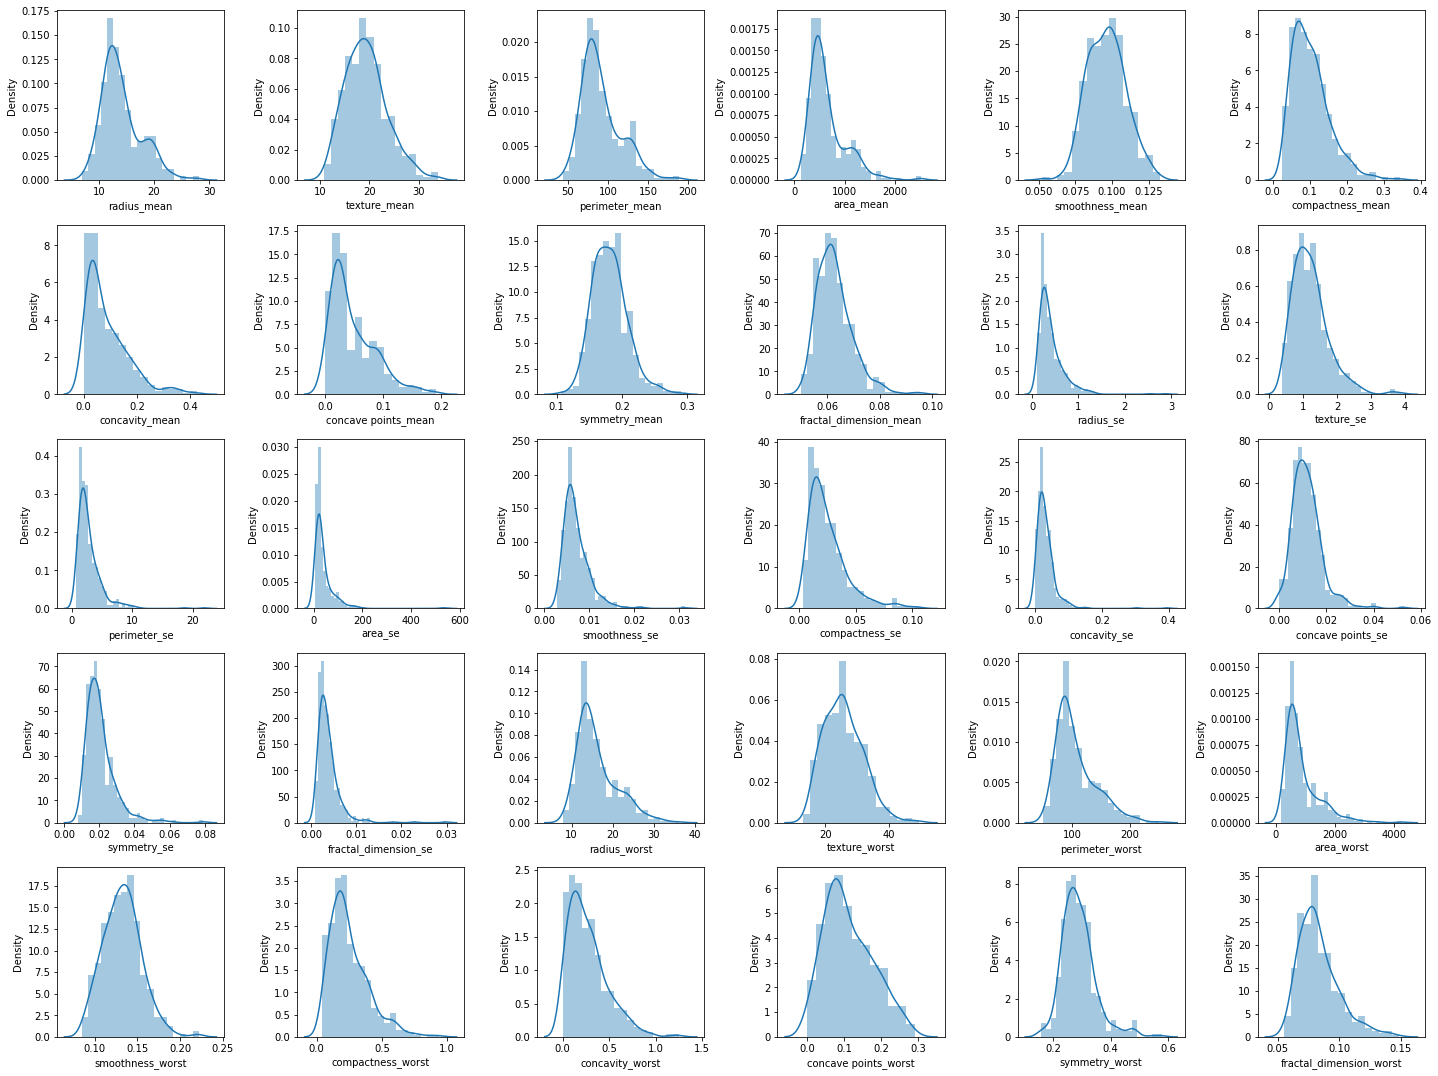

In [ ]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in cancer:
    if plotnumber<=30:
        ax=plt.subplot(5,6,plotnumber)
        sns.distplot(cancer[column])
        plt.xlabel(column)
        
        plotnumber+=1
plt.tight_layout() 
plt.show()

### Correlation heatmap including all features

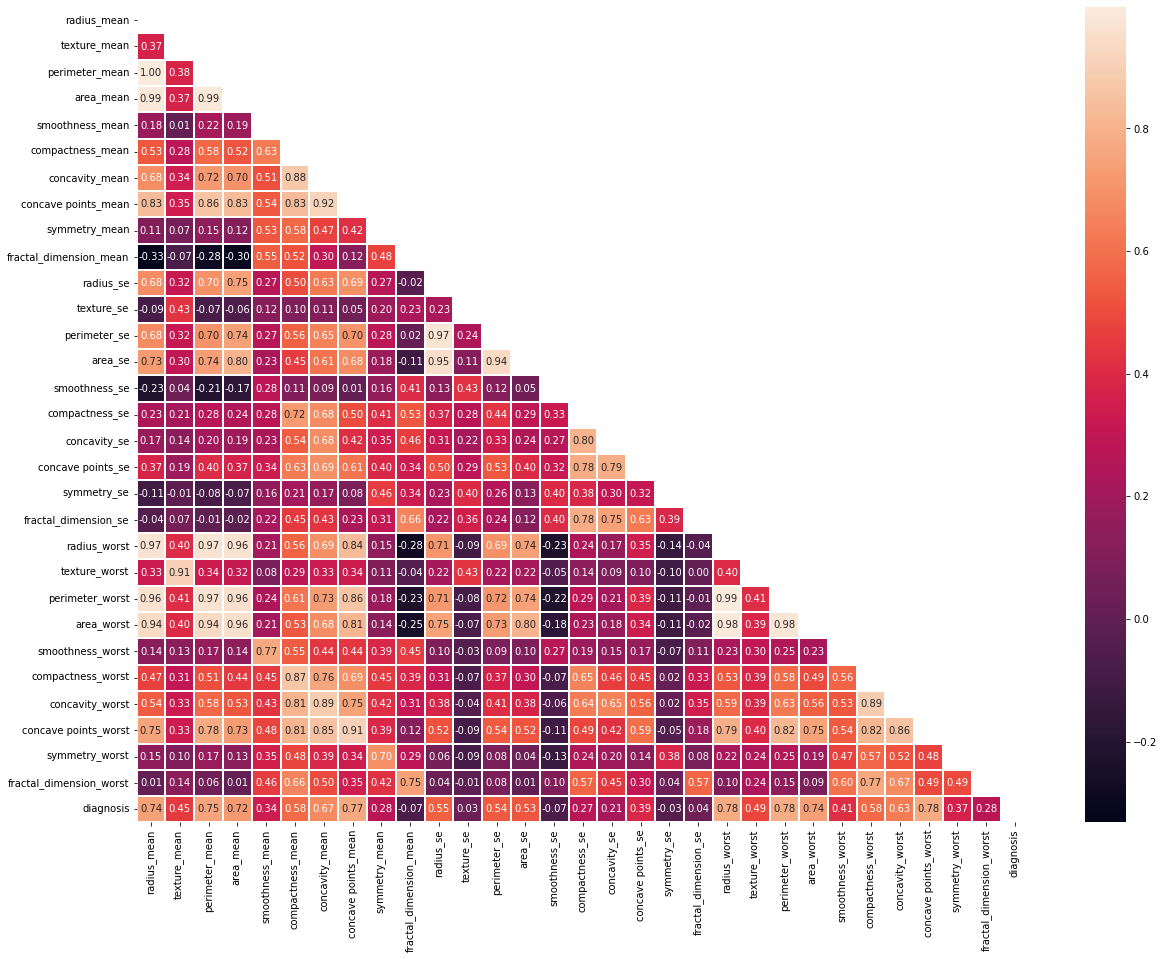

In [ ]:
#heatmap
plt.figure(figsize=(20,15))
corr=cancer.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))

sns.heatmap(corr,mask=mask,linewidth=1, annot=True, fmt=".2f")
plt.show()

### Splitting the dataset and data processing

We are going to split the data into training and test data into(80:20) .The training set contains a known output and the model learns on this data in order to be generalized to the other data later on. We have the test set in order to test our model's prediction on this subset 

In [ ]:
#Creating features and labelling
X=cancer.drop(["diagnosis"],axis=1)
y=cancer["diagnosis"]

In [ ]:
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
random_forest.fit(X_train,y_train)
y_pred=random_forest.predict(X_test)#predict the test results

In [ ]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
random_forest_accuracy=accuracy_score(y_test,y_pred)
print(random_forest_accuracy)

0.9625


Our model has an accuracy of 96.25% using the Random Forest Classifier

In [ ]:
#Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        42
           1       1.00      0.92      0.96        38

    accuracy                           0.96        80
   macro avg       0.97      0.96      0.96        80
weighted avg       0.97      0.96      0.96        80



### Feature Importance

With feature importance we are finding out which features have the biggest impact on predictions. In this instance we will use permutation importance.

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

permutation=PermutationImportance(random_forest,random_state=0).fit(X_test,y_test)
eli5.show_weights(permutation,feature_names=X_test.columns.tolist())

The most important feature in this case is concave points worst

## SHAP 

SHAP(SHapley Additive exPlanations) values shows the impact of having certain value for a given feature in coparison to the prediction we'd make if that feature took some baseline value. In this case we could wonder how much was a prediction given the fact that the radius was 12mm ,instead of some baseline value.That could help a doctor explain the predictions to a patient and understand how the model lead to a given outcome.

In [ ]:
import shap
#load JavaScript visualization code to the notebook
shap.initjs

<function shap.plots._force.initjs()>

Using SHAP explainer to compute the Shapler values for the first row using the Random Forest Classifier.

In [ ]:
row=0 #using first row 
pred=X_test.iloc[row]
pred_array=pred.values.reshape(1,-1)

expaliner=shap.TreeExplainer(random_forest)#creating expaliner for our model
shap_values=expaliner.shap_values(pred) #obtaining shap values

#Expected Reference value
print('Expected Value:',expaliner.expected_value)

#display first 5 rows of the shap values table
pd.DataFrame(shap_values).head()

Expected Value: [0.65572327 0.34427673]


0         1         2         3         4         5         6   \
0  0.003784 -0.034945 -0.019776  0.012853  0.001741  0.003923 -0.075068   
1 -0.003784  0.034945  0.019776 -0.012853 -0.001741 -0.003923  0.075068   

         7        8         9   ...        20        21       22        23  \
0 -0.055579 -0.00028  0.002463  ...  0.036567 -0.032134 -0.12071  0.000599   
1  0.055579  0.00028 -0.002463  ... -0.036567  0.032134  0.12071 -0.000599   

         24        25       26        27        28        29  
0 -0.007649 -0.010314 -0.04179 -0.052215 -0.011951 -0.019062  
1  0.007649  0.010314  0.04179  0.052215  0.011951  0.019062  

[2 rows x 30 columns]

The matrix of SHAP values.Each row sums to the difference between the model output for that sample and the expected value of the model output. The expected reference/base value 0.34. The force plot below show a visualization of thr matrix results.

#### SHAP Force Plot

The output prediction is 0.75. This means that the model classifies the observation as malignant. The base value is 0.3427.Feature value(radius_worst) that push towards a benign tumor causing is in blue and the length of the region shows how much the feature contributes to this effect. Feature values increasing the prediction and making our tumor malignant are red. The biggest impact comes from perimeter_worst.

In [38]:
#Obtain shap values for the test data
shap_values=expaliner.shap_values(X_test)

#shap force plot
shap.initjs()
shap.force_plot(expaliner.expected_value[0],shap_values[0],X_test)

Summary Plot basically takes the average of the SHAP value magnitude and plots it as a bar chart

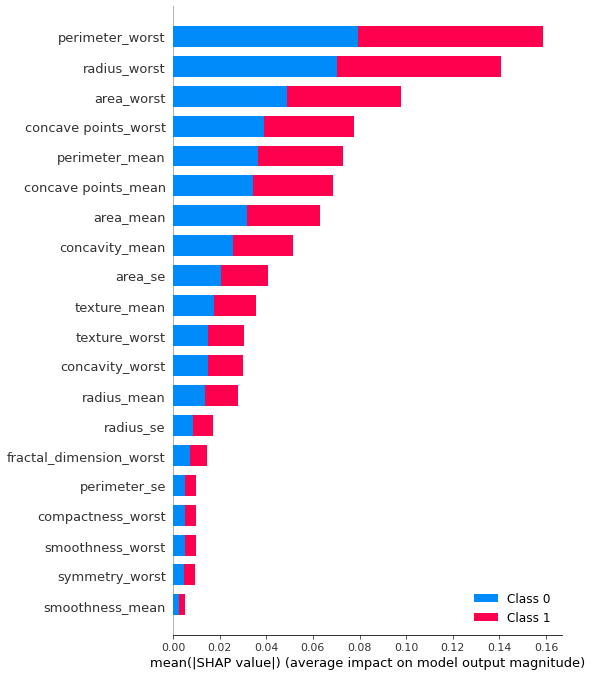

In [39]:
shap.initjs()
shap.summary_plot(shap_values,X_test,plot_type='bar')

From the above bar chart, we observe that perimeter_worst and radius_worst are the top 2 important features in determining tumor formation.On the other hand, symmetry_worst and smoothness_mean are the least important features.Malignant tumors have higher SHAP values.

#### SHAP Dependence Plot
SHAP dependence plots show the effect of one or two features across the whole dataset

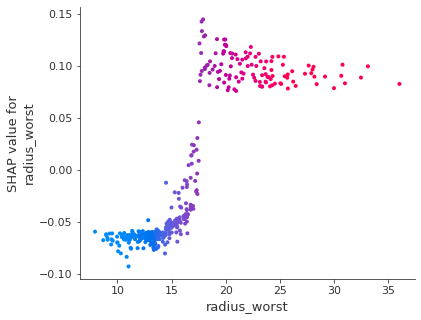

In [40]:
#Dependence plot
#Radius_worst 
shap_values=expaliner.shap_values(X)
shap.dependence_plot('radius_worst',shap_values[1],X,interaction_index='radius_worst')

From the dependence plot above on radius_worst ,larger radius_worst have a higher shap value. Pushing the model's prediction decisions to say that malignant tumors have a higher radius worst compared to benign tumors.

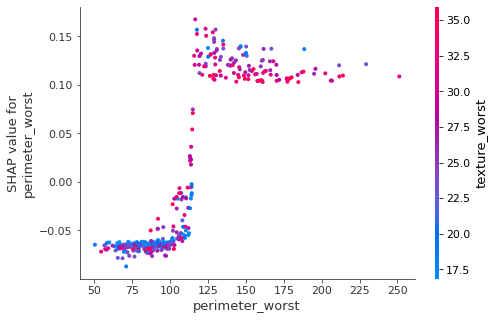

In [41]:
#Smoothness_mean
shap_values=expaliner.shap_values(X)
shap.dependence_plot('perimeter_worst',shap_values[1],X,interaction_index='texture_worst')

Another dependence plot is between perimeter worst and texture worst.It is evident that low values on perimeter worst imply a low probability of benign and samples which had high values of texture worst, indicates a higher risk im malignant tumors.

#### SHAP Decision Plot
Decision Plot gives an overall picture of the contribution to the prediction.From the bottom to the top of the decision plot.
Shap values are added to the base value of the model in determining the output values

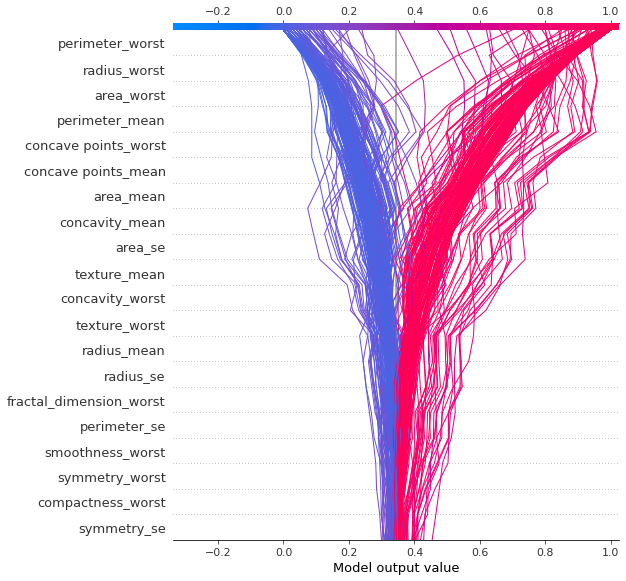

In [43]:
#SHAP Decision plot
shap.initjs()
shap.decision_plot(expaliner.expected_value[1],shap_values[1],X)

## LIME

Local Interpretable Model-Agnostic Explanations(LIME) focuses on training local explainable model to explain individual predictions. LIME focuses on training local explainable models to explain the individual predictions,instead of training an interpretable model to approximate a black box model. We train an interpretable classifier on the new samples and weight each sample according to how close it is to the instance we wish to expalin

In [46]:
import lime
import lime.lime_tabular

In [47]:
#define the expaliner
expaliner=lime.lime_tabular.LimeTabularExplainer(np.array(X_train),feature_names=np.array(X_train.columns),
                                                class_names=np.array([0,1]),discretize_continuous=True)

In [48]:
#Explain an instance
instance=np.random.randint(0,np.array(X_test).shape[0])
exp=expaliner.explain_instance(np.array(X_test)[instance],random_forest.predict_proba,num_features=5,top_labels=1)

In [50]:
exp.show_in_notebook(show_table=True,show_all=False)